# Proyecto Final de Estadística
### Tema: Impacto del trabajo remoto en la salud mental.

#### Integrantes:

> Claudia Hernández Pérez         C-312

> Joel Aparicio Tamayo            C-312

> Kendry Javier del Pino Barbosa  C-312

A medida que el trabajo remoto se convierte en la nueva norma, es esencial comprender su impacto en el bienestar mental de los empleados. Este conjunto de datos analiza cómo trabajar de forma remota afecta los niveles de estrés, el equilibrio entre la vida laboral y personal, y las condiciones de salud mental en diversas industrias y regiones.

Con 5,000 registros recopilados de empleados de todo el mundo, este conjunto de datos proporciona información valiosa sobre áreas clave como la ubicación del trabajo (remoto, híbrido, en sitio), los niveles de estrés, el acceso a recursos de salud mental y la satisfacción laboral. Está diseñado para ayudar a investigadores, profesionales de recursos humanos y empresas a evaluar la creciente influencia del trabajo remoto en la productividad y el bienestar.

Adjunto a este archivo se provee el archivo ```Impact_of_Remote_Work_on_Mental_Health.csv``` con los datos anteriormente descritos.




In [41]:
# Bibliotecas necesarias
import numpy as np # Para realizar cálculos estadísticos.
import scipy.stats as stats  # Para realizar cálculos estadísticos.
import matplotlib.pyplot as plt # Para visualizar distribuciones y análisis gráficos.
import pandas as pd # Para cargar y manipular los datos.
import re # Para trabajar con expresiones regulares
from ipywidgets import interact, IntSlider

#### Cargar los datos
Primero, utilizaremos **Pandas** para cargar el conjunto de datos en un DataFrame. Este paso es crucial para acceder a la información y explorar las primeras filas del conjunto de datos para entender su estructura.

In [42]:
impact = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
impact.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,30,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,38,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,38,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,32,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,24,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [43]:
impact.describe()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Social_Isolation_Rating,Company_Support_for_Remote_Work
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,34.950800,17.810200,39.614600,7.559000,2.984200,2.993800,3.007800
std,4.933239,10.020412,11.860194,4.636121,1.410513,1.394615,1.399046
min,20.000000,1.000000,20.000000,0.000000,1.000000,1.000000,1.000000
25%,32.000000,9.000000,29.000000,4.000000,2.000000,2.000000,2.000000
50%,35.000000,18.000000,40.000000,8.000000,3.000000,3.000000,3.000000
75%,38.000000,26.000000,50.000000,12.000000,4.000000,4.000000,4.000000
max,50.000000,35.000000,60.000000,15.000000,5.000000,5.000000,5.000000


In [44]:
impact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                           5000 non-null   object
 4   Industry                           5000 non-null   object
 5   Years_of_Experience                5000 non-null   int64 
 6   Work_Location                      5000 non-null   object
 7   Hours_Worked_Per_Week              5000 non-null   int64 
 8   Number_of_Virtual_Meetings         5000 non-null   int64 
 9   Work_Life_Balance_Rating           5000 non-null   int64 
 10  Stress_Level                       5000 non-null   object
 11  Mental_Health_Condition            3804 non-null   object
 12  Access

## Análisis las distribuciones de satisfacción entre los trabajadores



In [45]:
satisfaction_counts = impact.groupby( 'Satisfaction_with_Remote_Work' )[ 'Satisfaction_with_Remote_Work' ].agg( 'count' )
satisfaction_counts

Satisfaction_with_Remote_Work
Neutral        1648
Satisfied      1675
Unsatisfied    1677
Name: Satisfaction_with_Remote_Work, dtype: int64

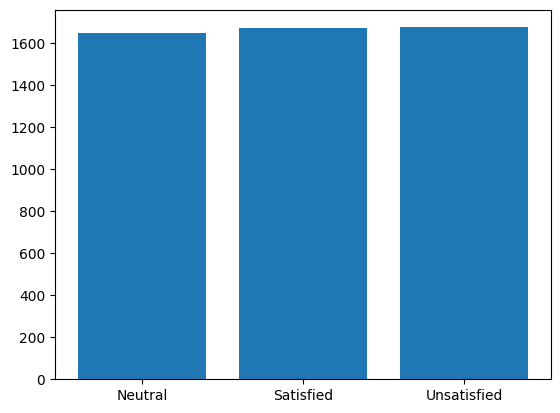

In [46]:
plt.bar( satisfaction_counts.index, satisfaction_counts.values )
plt.show()

### ¿Pero estos niveles de satisfacción que impacto puede tener en la salud mental de la población a nivel mundial?
Apoyándonos en que la minoría de nuestros datos está descontenta, ¿se podrá decir que la minoría de la población ha tenido que acceder a recursos de salud mental?

Probemos entonces que menos del 50% de los trabajadores a nivel mundial ha tenido que acceder a recursos de salud mental como resultado del trabajo remoto con un nivel de confianza de 90%.

$$H_0: \rho \geq 0.5$$

$$H_1: \rho < 0.5$$

Estadígrafo: $$\rho = \frac{\overline{\rho} - \rho_0}{\sqrt{\rho_0(1 - \rho_0)}} \sqrt{n}$$

Región crítica (n > 30): $$\rho < -Z_{1-\alpha}$$

In [56]:
resources_counts = impact.groupby( 'Access_to_Mental_Health_Resources' )[ 'Access_to_Mental_Health_Resources' ].agg( 'count' )
access_workers = resources_counts['Yes']
total_workers = len(impact)

# Parámetros dados
p_hat = access_workers / total_workers  # Proporción observada
p_0 = 0.5    # Proporción bajo la hipótesis nula
alpha = 0.1  # Nivel de significancia (1 - nivel de confianza)

# Calcular el estadístico de prueba
z = (p_hat - p_0) / np.sqrt(p_0 * (1 - p_0) / total_workers)

# Calcular el valor crítico para el nivel de significancia dado
z_alpha = stats.norm.ppf(1 - alpha)

# Determinar si rechazamos la hipótesis nula
if z < -z_alpha:
    print(f"Rechazamos la hipótesis nula H0")
else:
    print(f"No podemos rechazar la hipótesis nula H0")

-1.4990663761154805 1.2815515655446004
Rechazamos la hipótesis nula H0


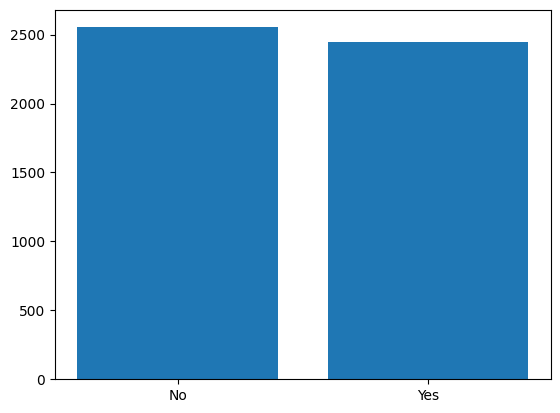

In [48]:
plt.bar( resources_counts.index, resources_counts.values )
plt.show()

#### Como se muestra, los niveles de satisfacción están directamente relacionados con la afectación de la salud mental de las personas en el trabajo remoto. Por lo que podría decirse que es una medida que ha resultado beneficiosa para la mayoría.

## Análisis de las edades de los encuestados

El código de abajo genera un gráfico de cajas y bigotes para visualizar la distribución de las edades de los encuestados. Un gráfico de cajas y bigotes es una representación gráfica que muestra la distribución de un conjunto de datos, destacando los valores atípicos y la dispersión de los datos. 

En un gráfico de cajas y bigotes, el cuadrado (también conocido como caja) representa el rango intercuartílico (IQR), que es la diferencia entre el cuartil superior (Q3) y el cuartil inferior (Q1). El cuartil inferior es el 25% de los datos más bajos, mientras que el cuartil superior es el 25% de los datos más altos.

Las líneas que se extienden desde la caja son llamadas "bigotes" y representan los valores atípicos. Los bigotes pueden ser de dos tipos: los que se extienden hasta el valor más alto o más bajo: no atípicos; y los que se extienden más allá de estos valores, indicando la presencia de valores atípicos.

Las bolitas (también conocidas como outliers) representan los valores atípicos, que son aquellos que se encuentran fuera de los límites definidos por los bigotes. Estos valores pueden ser considerados anómalos o inesperados en el conjunto de datos.



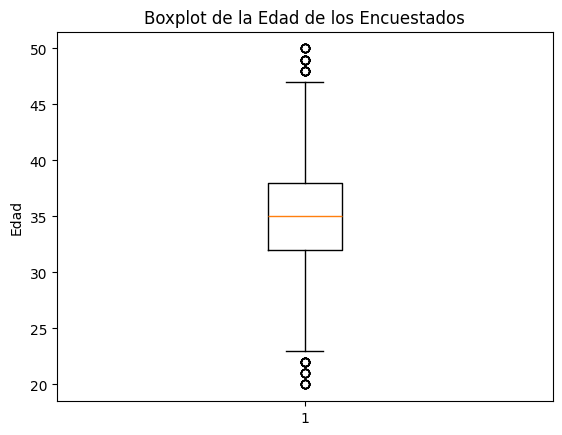

In [49]:
plt.boxplot(impact['Age'].dropna())
plt.ylabel('Edad')
plt.title('Boxplot de la Edad de los Encuestados')
plt.show()

### Aquí también se grafica la distribución de las edades, ahora en un histograma

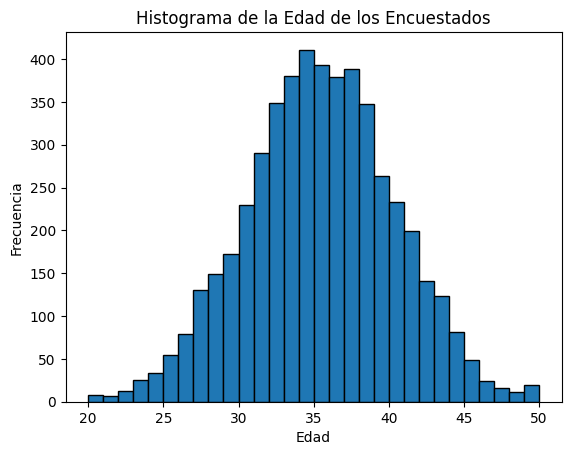

In [50]:
plt.hist(impact['Age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Edad de los Encuestados')
plt.show()

El histograma parece mostrar que las edades distribuyen normal. Tomemos dicha hipótesis e intentemos probarla: 

El siguiente bloque de código se enfoca en probar la hipótesis de normalidad de la distribución de las edades de los encuestados, utilizando la prueba de normalidad de D'Agostino-Pearson y visualizando los resultados a través de un histograma y un gráfico Q-Q.

Un gráfico Q-Q (Quantile-Quantile plot) es una herramienta gráfica utilizada para comparar la distribución de un conjunto de datos con una distribución teórica, como la distribución normal. El objetivo principal de un gráfico Q-Q es evaluar si los datos siguen una distribución específica.

Línea recta: Si los puntos en el gráfico Q-Q se alinean aproximadamente a lo largo de una línea recta, esto sugiere que los datos siguen la distribución teórica.

Desviaciones: Desviaciones significativas de la línea recta pueden indicar que los datos no siguen la distribución teórica.

Estadístico K2: 0.9932326970647298
Valor p: 0.6085864241032477
No se puede rechazar la hipótesis nula: los datos parecen provenir de una distribución normal.


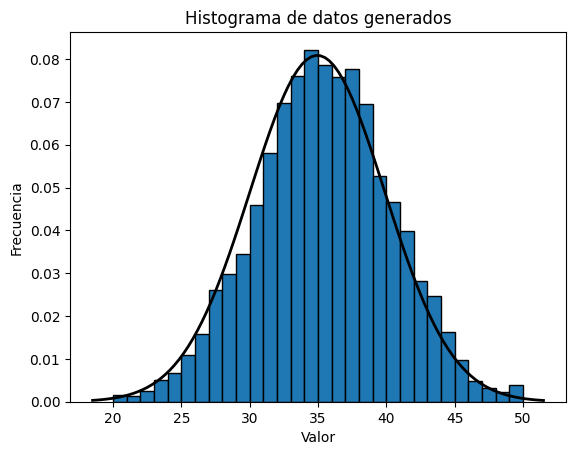

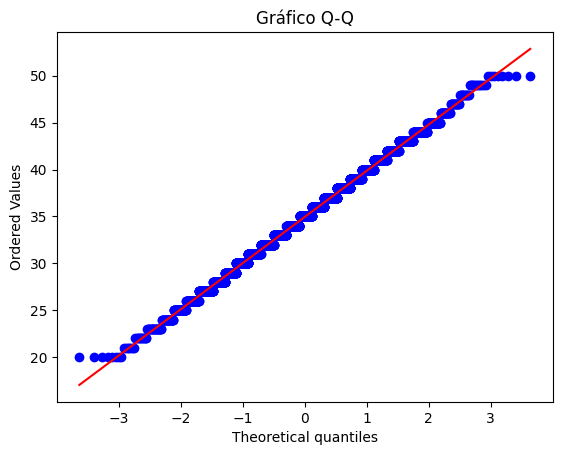

In [51]:
# Prueba de normalidad de D'Agostino-Pearson
k2, p = stats.normaltest(impact['Age'])
print(f'Estadístico K2: {k2}')
print(f'Valor p: {p}')

# Evaluar los resultados de la prueba
alpha = 0.05
if p > alpha:
    print("No se puede rechazar la hipótesis nula: los datos parecen provenir de una distribución normal.")
else:
    print("Se rechaza la hipótesis nula: los datos no parecen provenir de una distribución normal.")

# Visualización del histograma
plt.hist(impact['Age'], bins=30, edgecolor='black', density=True)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de datos generados')

# Superponer la curva de distribución normal
xmin, xmax = plt.xlim()
mean, std_dev = np.mean(impact['Age']), np.std(impact['Age'])
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.show()

# Gráfico Q-Q (Quantile-Quantile plot)
stats.probplot(impact['Age'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q')
plt.show()

#### Esto se traduce a que los encuestados como son trabajadores, lo más 'normal' que podía pasar es que las edades más populares estuviesen en los datos centrales y los menos en las esquinas, dado que sobre los 20 se empieza en el mundo laboral y ya luego cerca de los 50 es menos frecuente que continúe su vida profesional.

### Una vez probado que las edades distribuyen normal, hagamos algunas pruebas de hipótesis


1- Se quiere probar que la media de las edades de los trabajadores a nivel mundial es mayor de 40 años con un nivel de confianza del 95%

$$H_0: \mu \leq 40$$

$$H_1: \mu > 40$$

Estadígrafo: $$T = \frac{\overline{X} - \mu_0}{S} \sqrt{n}$$

Región crítica (n > 30): $$T > Z_{1-\alpha}$$

In [52]:
# Paso 1: Calcular la media y la desviación estándar de las edades
mean_age = np.mean(impact['Age'])
std_dev_age = np.std(impact['Age'], ddof=1)  # ddof=1 para muestra

# Paso 2: Definir la media poblacional con la que deseas comparar
population_mean = 40

# Paso 3: Calcular el estadístico t
n = len(impact['Age'])
T = ((mean_age - population_mean) * np.sqrt(n)) / (std_dev_age)

# Paso 4: Determinar si T pertenece a la región crítica
alpha = 0.05 
Z = stats.norm.ppf(1 - alpha)

# Paso 5: Tomar una decisión sobre la hipótesis nula
if T > Z:
    print("Se rechaza la hipótesis nula: la media de las edades es mayor de 40.")
else:
    print("No se puede rechazar la hipótesis nula: la media de las edades no es significativamente mayor de 40.")

print(f'Estadístico T: {T}')

No se puede rechazar la hipótesis nula: la media de las edades no es significativamente mayor de 40.
Estadístico T: -72.3728078388862
